In [2]:
import pandas as pd
import re
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import matplotlib.pyplot as plt

sns.set(color_codes=True)

In [3]:
story_quality = pd.read_csv('./data/story_quality.csv')
story_quality.head()

,Unnamed: 0,translatedSet,src,tgt,user,type,level,story,direction,score,bleu-1,bleu-2,bleu-3,bleu-4
0,0,Test User 1001 | A Helping Hand PE L4 | Hindi ...,"थोड़ी सी मदद प्रिय जो भी हो , तुम जानती ही हो ...","Some help dear whatever happens , you know who...",Test User 1001,PE,L4,A Helping Hand,Hindi -> English,0.998011,1.000000,1.000000,0.967189,0.935397
1,1,Test User 1001 | All Aboard PE L2 | Hindi -> E...,मुझे पीला - पीला कुछ दिख रहा है अब मेरी बारी ह...,"I see something yellow Now it's my turn , said...",Test User 1001,PE,L2,All Aboard,Hindi -> English,0.986191,1.000000,0.978945,0.966190,0.974534
2,2,Test User 1001 | At Least I'm Ok BL L3 | Hindi...,"खैर , हमें तो कोई दिक्कत नहीं है , जँगली बिल्ल...","Well, we don't have any problem, thought the w...",Test User 1001,BL,L3,At Least I'm Ok,Hindi -> English,0.996466,1.000000,1.000000,1.000000,1.000000
3,4,Test User 1001 | How to be an Otter PE L3 | Hi...,"याद रखो , नदी हमेशा तुम्हारा घर रहेगी तुमको बह...","Remember , the river will always be your home ...",Test User 1001,PE,L3,How to be an Otter,Hindi -> English,0.997633,1.000000,1.000000,1.000000,1.000000
4,6,Test User 1001 | My Best Friend PE L1 | Hindi ...,मैं जानती हूँ हम दोनों फ़िर सपने में मज़े करेंगे...,I know we will have fun in dreams.. Now I don'...,Test User 1001,PE,L1,My Best Friend,Hindi -> English,0.996147,0.967742,0.937958,0.884186,0.848542


In [4]:
keystrokes = pd.read_csv('data/mt.dockeystroke_complete.csv')
keystrokes.head()

,id,translatedSet,keystrokeseries,trump
0,362,Admin | sand_test1 | English -> Hindi,"[['Default Layout', 0], [1, 1092], ['card0', 1...",Y
1,361,Admin | Test_sand | Hindi -> English,"[['Default Layout', 1], [1, 942], ['card0', 95...",Y
2,360,Test User 1601 | खरगोश के लम्बे कान MT L2 | En...,"[['Default Layout', 1], [1, 14963], ['card0', ...",Y
3,359,Test User 1601 | कछुआ MT L4 | English -> Hindi,"[['Default Layout', 1], [1, 19842], [17, 21478...",Y
4,358,Test User 1601 | मेरे पलंग के नीचे PE L2 | Eng...,"[['Default Layout', 1], [1, 11028], ['card0', ...",Y


In [5]:
# def break_user(x):
#     xs1 = x.split('|')
    
#     if len(xs1) > 1:
#         return xs1[0]
        
# def breakdown_level(x):
#     xs1 = x.split('|')
#     if len(xs1) > 1:
#         xs2 = xs1[1].split(' ')
#         xs2 = list(filter(None, xs2))
#         if len(xs2) >= 3:
#             if re.match(r"L\d", xs2[-1]):
#                 return xs2[-1]
#     return ''

# def breakdown_type(x):
#     xs1 = x.split('|')
#     if len(xs1) > 1:
#         xs2 = xs1[1].split(' ')
#         xs2 = list(filter(None, xs2))
#         if len(xs2) >= 3:
#             if re.match(r"L\d", xs2[-1]):
#                 return xs2[-2]
#     return ''

# def breakdown_story(x):
#     xs1 = x.split('|')
#     if len(xs1) > 1:
#         xs2 = xs1[1].split(' ')
#         xs2 = list(filter(None, xs2))
#         if len(xs2) >= 3:
#             if re.match(r"L\d", xs2[-1]):
#                 return ' '.join(xs2[:-2])
#     return ''

# def breakdown_direction(x):
#     xs1 = x.split('|')
#     if len(xs1) > 1:
#         return xs1[2].strip()

In [6]:
# keystrokes['user'] = keystrokes['translatedSet'].apply(lambda x: break_user(x))
# keystrokes['type'] = keystrokes['translatedSet'].apply(lambda x: breakdown_type(x))
# keystrokes['level'] = keystrokes['translatedSet'].apply(lambda x: breakdown_level(x))
# keystrokes['story'] = keystrokes['translatedSet'].apply(lambda x: breakdown_story(x))
# keystrokes['direction'] = keystrokes['translatedSet'].apply(lambda x: breakdown_direction(x))

keystrokes['total_keys'] = keystrokes['keystrokeseries'].apply(lambda x: len(ast.literal_eval(x)))
keystrokes['total_time'] = keystrokes['keystrokeseries'].apply(lambda x: ast.literal_eval(x)[-1][1])

In [7]:
keystrokes.head()

,id,translatedSet,keystrokeseries,trump,total_keys,total_time
0,362,Admin | sand_test1 | English -> Hindi,"[['Default Layout', 0], [1, 1092], ['card0', 1...",Y,11,7001
1,361,Admin | Test_sand | Hindi -> English,"[['Default Layout', 1], [1, 942], ['card0', 95...",Y,41,28364
2,360,Test User 1601 | खरगोश के लम्बे कान MT L2 | En...,"[['Default Layout', 1], [1, 14963], ['card0', ...",Y,1097,1358937
3,359,Test User 1601 | कछुआ MT L4 | English -> Hindi,"[['Default Layout', 1], [1, 19842], [17, 21478...",Y,3470,4237895
4,358,Test User 1601 | मेरे पलंग के नीचे PE L2 | Eng...,"[['Default Layout', 1], [1, 11028], ['card0', ...",Y,755,728845


In [8]:
keystrokes = keystrokes.replace(np.nan, '', regex=True)
keystrokes = keystrokes[keystrokes['translatedSet'].str.contains("Test User")]

In [9]:
len(keystrokes)

195

In [10]:
quakey = pd.merge(keystrokes, story_quality, how='inner', left_on=['translatedSet'], right_on = ['translatedSet'])

In [11]:
# import seaborn as sns
# sns.set(color_codes=True)
# ax = sns.lmplot(x="bleu-4", y="total_time", hue="type", data=quakey, order=3)
# ax

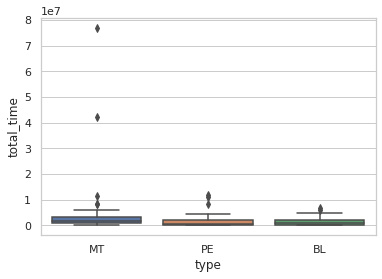

In [12]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="type", y="total_time", data=quakey)
ax

In [13]:
quant_thres = 0.99
new_quakey = quakey[(quakey["total_time"] < quakey["total_time"].quantile(quant_thres)) & (quakey["total_keys"] < quakey["total_keys"].quantile(quant_thres))]

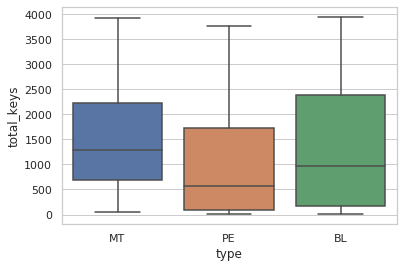

In [14]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="type", y="total_keys", data=new_quakey)
ax

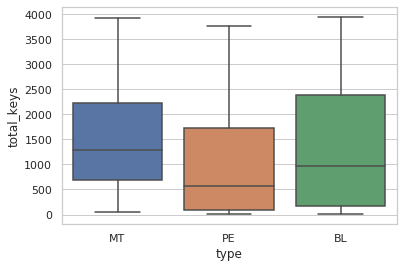

In [15]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="type", y="total_keys", data=new_quakey)
ax

In [18]:
new_quakey

,id,translatedSet,keystrokeseries,trump,total_keys,total_time,Unnamed: 0,src,tgt,user,type,level,story,direction,score,bleu-1,bleu-2,bleu-3,bleu-4
0,339,Test User | Jungle Brew MT L4 | Hindi -> English,"[['Default Layout', 1], [1, 8872], ['card37', ...",Y,3347,2342218,197,मसाला चाय दक्षिणी भारत में एक छोटे से पहाड़ी खे...,"Masala tea. In South India, in a small mountai...",Test User,MT,L4,Jungle Brew,Hindi -> English,0.996269,0.961538,0.927536,0.773759,0.673610
2,336,Test User 301 | Whats That Smell PE L3 | Hindi...,"[['Default Layout', 4], [1, 16561], ['card0', ...",Y,3017,3658123,100,तारा और उसका परिवार घर पहुँचते हैं घर वापस आकर...,Tara and her family reaches home. It feels nic...,Test User 301,PE,L3,Whats That Smell,Hindi -> English,0.992542,1.000000,0.983192,0.921514,0.805685
3,335,Test User 301 | A Helping Hand BL L4 | Hindi -...,"[['Default Layout', 2], [1, 8334], ['card1', 8...",Y,2717,2192266,89,"थोड़ी सी मदद प्रिय जो भी हो , तुम जानती ही हो ...","A little help Dearest Whatever it may be, you ...",Test User 301,BL,L4,A Helping Hand,Hindi -> English,0.998138,1.000000,0.963624,0.845103,0.694127
4,334,Test User 1302 | A Helping Hand MT L4 | Hindi ...,"[['Default Layout', 2], [1, 3945], ['card0', 3...",Y,2978,3908143,41,"थोड़ी सी मदद प्रिय जो भी हो , तुम जानती ही हो ...","A little help Dear Anyway, you know who you ar...",Test User 1302,MT,L4,A Helping Hand,Hindi -> English,0.997441,1.000000,0.980581,0.907697,0.781984
6,332,Test User 301 | The Rabbit's Long Ears MT L2 |...,"[['Default Layout', 2], [1, 8230], ['card0', 8...",Y,1661,1329803,97,सियार और खरगोश बहुत अच्छे मित्र थे एक दिन सिया...,The jackal and the rabbit were very good frien...,Test User 301,MT,L2,The Rabbit's Long Ears,Hindi -> English,0.995473,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,93,Test User 1401 | Under My Bed BL L2 | Hindi ->...,"[['Default Layout', 0], [1, 2031], ['card0', 2...",Y,796,928317,61,जंगल में असली शेरों के सपने जो देखने हैं अब मै...,I have to dream about the real lions in the ju...,Test User 1401,BL,L2,Under My Bed,Hindi -> English,0.991411,1.000000,0.939336,0.897079,0.832914
147,92,Test User 1401 | My Home BL L1 | Hindi -> English,"[['Default Layout', 1], [1, 1812], ['card0', 1...",Y,646,415613,57,"जल्दी आना तुम मेरे घर ज़रूर आना , मुझसे मिलने ज...",come soon do come to my house to meet me when ...,Test User 1401,BL,L1,My Home,Hindi -> English,0.990253,1.000000,0.957427,0.971413,0.978482
148,91,Test User | All Aboard BL L2 | Hindi -> English,"[['Default Layout', 1], [1, 1055], ['card1', 1...",Y,19,14469,193,मुझे पीला - पीला कुछ दिख रहा है अब मेरी बारी ह...,"""I can see something yellow."" ""It's my turn no...",Test User,BL,L2,All Aboard,Hindi -> English,0.972110,0.951220,0.912314,0.897836,0.858347
149,90,Test User | My Best Friend BL L1 | Hindi -> En...,"[['Default Layout', 0], [1, 1615], ['card0', 1...",Y,817,478757,199,मैं जानती हूँ हम दोनों फ़िर सपने में मज़े करेंगे...,I know that both of us will have fun again in ...,Test User,BL,L1,My Best Friend,Hindi -> English,0.994144,0.928571,0.856202,0.775567,0.727365


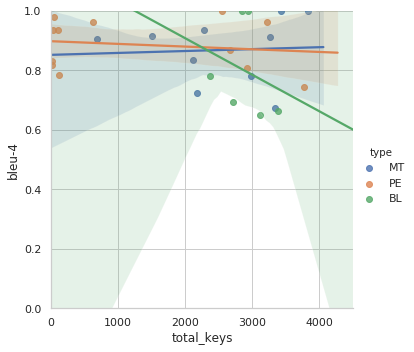

In [17]:
col = "bleu-4"
level = "L4"
x = "total_keys"
y = col
# y = "total_keys"
ax = sns.lmplot(x=x, y=y, hue="type", hue_order=["MT", "PE", "BL"], data=new_quakey[(new_quakey['level'] == level) & (new_quakey[col] != 0)])
# ax.set(ylim=(0,6000000))
# ax.set(ylim=(0,8000))
ax.set(ylim=(0,1))
ax.set(xlim=(0,None))

In [147]:
new_quakey = new_quakey.replace(np.nan, '', regex=True)

In [165]:
# new_quakey[(new_quakey['tgt'] != '') & (new_quakey['bleu-4'] == 0)]
new_quakey.head()

,id,translatedSet,keystrokeseries,trump,total_keys,total_time,Unnamed: 0,src,tgt,user,type,level,story,direction,score,bleu-1,bleu-2,bleu-3,bleu-4
0,339,Test User | Jungle Brew MT L4 | Hindi -> English,"[['Default Layout', 1], [1, 8872], ['card37', ...",Y,3347,2342218,197,मसाला चाय दक्षिणी भारत में एक छोटे से पहाड़ी खे...,"Masala tea. In South India, in a small mountai...",Test User,MT,L4,Jungle Brew,Hindi -> English,0.996269,0.961538,0.927536,0.773759,0.673610
2,336,Test User 301 | Whats That Smell PE L3 | Hindi...,"[['Default Layout', 4], [1, 16561], ['card0', ...",Y,3017,3658123,100,तारा और उसका परिवार घर पहुँचते हैं घर वापस आकर...,Tara and her family reaches home. It feels nic...,Test User 301,PE,L3,Whats That Smell,Hindi -> English,0.992542,1.000000,0.983192,0.921514,0.805685
3,335,Test User 301 | A Helping Hand BL L4 | Hindi -...,"[['Default Layout', 2], [1, 8334], ['card1', 8...",Y,2717,2192266,89,"थोड़ी सी मदद प्रिय जो भी हो , तुम जानती ही हो ...","A little help Dearest Whatever it may be, you ...",Test User 301,BL,L4,A Helping Hand,Hindi -> English,0.998138,1.000000,0.963624,0.845103,0.694127
4,334,Test User 1302 | A Helping Hand MT L4 | Hindi ...,"[['Default Layout', 2], [1, 3945], ['card0', 3...",Y,2978,3908143,41,"थोड़ी सी मदद प्रिय जो भी हो , तुम जानती ही हो ...","A little help Dear Anyway, you know who you ar...",Test User 1302,MT,L4,A Helping Hand,Hindi -> English,0.997441,1.000000,0.980581,0.907697,0.781984
6,332,Test User 301 | The Rabbit's Long Ears MT L2 |...,"[['Default Layout', 2], [1, 8230], ['card0', 8...",Y,1661,1329803,97,सियार और खरगोश बहुत अच्छे मित्र थे एक दिन सिया...,The jackal and the rabbit were very good frien...,Test User 301,MT,L2,The Rabbit's Long Ears,Hindi -> English,0.995473,1.000000,1.000000,1.000000,1.000000


In [150]:
story_quality[story_quality['tgt'] == '']

,Unnamed: 0,translatedSet,src,tgt,user,type,level,story,direction,score,bleu-1,bleu-2,bleu-3,bleu-4
